# Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
from scipy import stats
from pandas.tools import plotting
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm
from bokeh.io import output_notebook, show
output_notebook()
from bokeh.models import Jitter

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE


Loading BokehJS ...

In [18]:
my_data = pd.read_csv("data/salary_for_regression.csv")
my_data.head()

,player,position,age,team,games,games_started,mins_per_g,fg_per_g,fga_per_g,fg_pct,...,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,salary
0,Alex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,0.393,...,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,5994764
1,Steven Adams,C,23,OKC,80,80,29.9,4.7,8.2,0.571,...,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,3140517
2,Arron Afflalo,SG,31,SAC,61,45,25.9,3.0,6.9,0.440,...,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,12500000
3,Alexis Ajinca,C,28,NOP,39,15,15.0,2.3,4.6,0.500,...,1.2,3.4,4.5,0.3,0.5,0.6,0.8,2.0,5.3,4638203
4,Cole Aldrich,C,28,MIN,62,0,8.6,0.7,1.4,0.523,...,0.8,1.7,2.5,0.4,0.4,0.4,0.3,1.4,1.7,7643979


In [19]:
print my_data['position'].unique()
print my_data['team'].unique()

['SG' 'C' 'PF' 'SF' 'PG']
['OKC' 'SAC' 'NOP' 'MIN' 'SAS' 'MEM' 'POR' 'HOU' 'MIL' 'NYK' 'DEN' 'ORL'
 'MIA' 'PHO' 'DAL' 'CHO' 'PHI' 'DET' 'ATL' 'WAS' 'BRK' 'LAL' 'UTA' 'BOS'
 'IND' 'CHI' 'TOR' 'LAC' 'GSW' 'CLE']


In [4]:
from datacleaner import autoclean
#my_clean_data = autoclean(my_data, drop_nans=True)
my_clean_data = autoclean(my_data)

my_clean_data.head()

,player,position,age,team,games,games_started,mins_per_g,fg_per_g,fga_per_g,fg_pct,...,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,salary
0,8,4,23,20,68,6,15.5,2.0,5.0,0.393,...,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,5994764
1,301,0,23,20,80,80,29.9,4.7,8.2,0.571,...,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,3140517
2,23,4,31,25,61,45,25.9,3.0,6.9,0.440,...,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,12500000
3,11,0,28,18,39,15,15.0,2.3,4.6,0.500,...,1.2,3.4,4.5,0.3,0.5,0.6,0.8,2.0,5.3,4638203
4,51,0,28,17,62,0,8.6,0.7,1.4,0.523,...,0.8,1.7,2.5,0.4,0.4,0.4,0.3,1.4,1.7,7643979


In [5]:
my_clean_data['position'].unique()

array([4, 0, 1, 3, 2])

In [6]:
df = my_clean_data.drop('player', axis = 1)
df.head()

,position,age,team,games,games_started,mins_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,...,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,salary
0,4,23,20,68,6,15.5,2.0,5.0,0.393,1.4,...,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,5994764
1,0,23,20,80,80,29.9,4.7,8.2,0.571,0.0,...,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,3140517
2,4,31,25,61,45,25.9,3.0,6.9,0.440,1.0,...,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,12500000
3,0,28,18,39,15,15.0,2.3,4.6,0.500,0.0,...,1.2,3.4,4.5,0.3,0.5,0.6,0.8,2.0,5.3,4638203
4,0,28,17,62,0,8.6,0.7,1.4,0.523,0.0,...,0.8,1.7,2.5,0.4,0.4,0.4,0.3,1.4,1.7,7643979


In [7]:
df.describe()

,position,age,team,games,games_started,mins_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,...,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,salary
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,...,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02
mean,1.970588,26.297059,14.535294,55.811765,28.338235,20.975882,3.326765,7.371176,0.440512,0.809412,...,0.890000,2.850000,3.739118,1.952353,0.651765,0.409706,1.152647,1.749706,8.983235,6.590092e+06
std,1.420152,4.379153,8.767831,24.180123,29.386455,8.999237,2.166769,4.534762,0.092166,0.757869,...,0.756576,1.719067,2.332513,1.769829,0.412807,0.410906,0.756813,0.726388,6.037077,6.458804e+06
min,0.000000,19.000000,0.000000,1.000000,0.000000,2.600000,0.000000,0.300000,0.000000,0.000000,...,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.767000e+03
25%,1.000000,23.000000,7.000000,38.000000,1.000000,14.175000,1.700000,4.000000,0.399000,0.200000,...,0.300000,1.600000,2.100000,0.700000,0.375000,0.100000,0.600000,1.300000,4.675000,1.452760e+06
50%,2.000000,26.000000,15.000000,65.000000,15.000000,20.500000,2.900000,6.400000,0.443000,0.600000,...,0.600000,2.500000,3.200000,1.400000,0.600000,0.300000,1.000000,1.800000,7.600000,4.000000e+06
75%,3.000000,29.000000,22.000000,75.000000,58.000000,28.725000,4.600000,9.900000,0.482750,1.300000,...,1.200000,3.600000,4.825000,2.600000,0.900000,0.500000,1.600000,2.200000,11.850000,1.047750e+07
max,4.000000,40.000000,29.000000,82.000000,82.000000,37.800000,10.300000,20.300000,0.750000,4.100000,...,4.000000,9.500000,12.800000,10.700000,2.000000,2.600000,4.100000,3.700000,28.900000,3.096345e+07


In [8]:
df.corr()

,position,age,team,games,games_started,mins_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,...,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,salary
position,1.000000,0.018010,-0.013894,0.039525,0.027240,0.153112,0.040903,0.141176,-0.394144,0.408357,...,-0.540029,-0.294824,-0.392102,0.162107,0.221989,-0.438791,0.035478,-0.223625,0.088745,-0.018071
age,0.018010,1.000000,-0.037727,0.058363,0.027251,0.101659,0.041098,0.046021,0.060094,0.108836,...,-0.019757,0.081485,0.053643,0.118526,0.080238,-0.099148,0.035498,-0.003265,0.046885,0.367930
team,-0.013894,-0.037727,1.000000,0.016575,-0.013791,0.007593,-0.008132,-0.025237,0.107879,-0.075163,...,0.043677,-0.003993,0.010123,-0.075531,-0.005070,0.067822,0.006676,0.105118,-0.020266,-0.011134
games,0.039525,0.058363,0.016575,1.000000,0.573693,0.660662,0.525823,0.501547,0.374506,0.374950,...,0.259374,0.493354,0.447276,0.369077,0.507421,0.314802,0.443702,0.563393,0.507747,0.384903
games_started,0.027240,0.027251,-0.013791,0.573693,1.000000,0.810657,0.733882,0.711043,0.270896,0.438763,...,0.412013,0.640480,0.605607,0.506786,0.620405,0.415270,0.628506,0.589167,0.724318,0.549321
mins_per_g,0.153112,0.101659,0.007593,0.660662,0.810657,1.000000,0.877110,0.882841,0.277293,0.624844,...,0.350124,0.696819,0.626694,0.655734,0.762735,0.375656,0.772098,0.680872,0.873860,0.611877
fg_per_g,0.040903,0.041098,-0.008132,0.525823,0.733882,0.877110,1.000000,0.978746,0.337187,0.611274,...,0.359204,0.661634,0.603646,0.645910,0.648830,0.387416,0.822246,0.571143,0.988378,0.613465
fga_per_g,0.141176,0.046021,-0.025237,0.501547,0.711043,0.882841,0.978746,1.000000,0.189850,0.690533,...,0.235714,0.589625,0.510465,0.684589,0.665027,0.289601,0.834318,0.528491,0.982719,0.612942
fg_pct,-0.394144,0.060094,0.107879,0.374506,0.270896,0.277293,0.337187,0.189850,1.000000,-0.064903,...,0.545314,0.436470,0.498594,0.043939,0.159126,0.456744,0.183452,0.389933,0.279615,0.191932
fg3_per_g,0.408357,0.108836,-0.075163,0.374950,0.438763,0.624844,0.611274,0.690533,-0.064903,1.000000,...,-0.231241,0.184532,0.060282,0.479992,0.479875,-0.085262,0.472034,0.222005,0.674902,0.400327


In [9]:
df = df.drop('position', axis = 1)
df= df.drop('team', axis = 1)
df.head()

,age,games,games_started,mins_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,...,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,salary
0,23,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,...,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,5994764
1,23,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,...,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,3140517
2,31,61,45,25.9,3.0,6.9,0.440,1.0,2.5,0.411,...,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,12500000
3,28,39,15,15.0,2.3,4.6,0.500,0.0,0.1,0.000,...,1.2,3.4,4.5,0.3,0.5,0.6,0.8,2.0,5.3,4638203
4,28,62,0,8.6,0.7,1.4,0.523,0.0,0.0,0.000,...,0.8,1.7,2.5,0.4,0.4,0.4,0.3,1.4,1.7,7643979


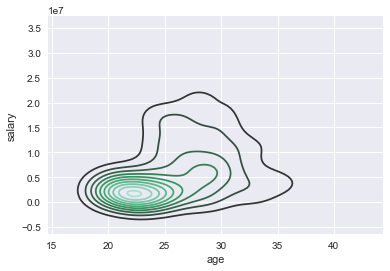

In [10]:
import seaborn as sns
sns.kdeplot(df.age, df.salary)

players at 25-30 years old have higher salaries

In [20]:
# Analyze the team peformence base on the # of players and the average data.
count = my_data[['team', 'player']].groupby('team').count().sort_values(by=['player'])
count

,player
team,
WAS,8
OKC,9
NYK,9
CLE,9
DAL,9
GSW,9
HOU,9
MIA,10
LAC,10


In [21]:
# team performence
teams = my_data.groupby('team').mean().sort_values(by=['salary'])
teams

,age,games,games_started,mins_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,...,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,salary
team,,,,,,,,,,,,,,,,,,,,,
OKC,25.777778,49.111111,33.333333,19.144444,2.655556,5.800000,0.460111,0.655556,1.944444,0.247556,...,1.000000,2.400000,3.377778,1.088889,0.600000,0.511111,0.744444,1.633333,6.722222,3.370943e+06
PHI,24.583333,39.833333,17.166667,20.483333,3.608333,8.025000,0.450500,0.775000,2.258333,0.313667,...,1.216667,2.966667,4.166667,1.550000,0.458333,0.541667,1.566667,2.016667,9.875000,3.702962e+06
MIN,24.846154,60.230769,31.538462,22.238462,3.523077,7.653846,0.443231,0.723077,2.038462,0.282462,...,1.046154,2.800000,3.838462,2.107692,0.730769,0.423077,1.215385,1.930769,9.476923,4.563934e+06
MIA,27.300000,48.900000,21.800000,23.450000,3.650000,8.610000,0.421500,1.080000,2.950000,0.327600,...,0.680000,2.660000,3.340000,2.550000,0.780000,0.350000,1.330000,1.980000,9.840000,4.823190e+06
TOR,23.916667,51.916667,20.750000,17.108333,2.250000,4.933333,0.455917,0.458333,1.400000,0.291500,...,0.983333,2.358333,3.350000,1.016667,0.616667,0.458333,0.733333,1.708333,5.883333,4.831781e+06
PHO,26.071429,47.428571,23.285714,18.750000,2.871429,6.771429,0.397571,0.657143,2.114286,0.271286,...,0.842857,2.521429,3.364286,1.671429,0.571429,0.335714,1.235714,1.778571,8.050000,5.005938e+06
DEN,25.714286,53.928571,26.500000,21.364286,3.535714,7.664286,0.439571,1.007143,2.735714,0.318429,...,0.935714,2.942857,3.892857,2.207143,0.614286,0.292857,1.228571,1.642857,9.728571,5.081806e+06
HOU,26.888889,58.111111,27.777778,21.277778,3.455556,7.166667,0.460444,1.100000,3.022222,0.257333,...,1.077778,2.688889,3.755556,1.233333,0.577778,0.455556,0.800000,1.766667,9.122222,5.202559e+06
BRK,26.750000,53.666667,26.666667,20.208333,3.041667,6.850000,0.426083,0.791667,2.383333,0.319583,...,0.841667,2.966667,3.825000,2.083333,0.666667,0.450000,1.316667,1.883333,8.425000,5.251762e+06


-Team WAS has the lowest number of players, and average salarie.But the each average variables is higher than the most of other teams
- Team TOR has more players and higher average salaries, but the average number of variables are less than most of other teams

In [40]:
# Position performence
# create new dataset, list the numbers as column
def f(x):
     return pd.Series(dict(position=x['position'].min(),
                        palyer_count = x['player'].count(),
                        age = x['age'].mean(),
                        games_started = x['games_started'].mean(),
                        games= x['games'].mean(),
                        mins_per_g = x['mins_per_g'].mean(),
                        fg_per_g = x['fg_per_g'].mean(),
                        fga_per_g = x['fga_per_g'].mean(),
                        fg_pct = x['fg_pct'].mean(),
                        fg3_per_g = x['fg3_per_g'].mean(),
                        fg3a_per_g = x['fg3a_per_g'].mean(),
                        fg3_pct = x['fg3_pct'].mean(), 
                        fg2_per_g = x['fg2_per_g'].mean(),
                        fg2a_per_g = x['fg2a_per_g'].mean(),
                        efg_pct = x['efg_pct'].mean(),
                        ft_per_g = x['ft_per_g'].mean(),
                        fta_per_g = x['fta_per_g'].mean(),
                        ft_pct = x['ft_pct'].mean(),
                        orb_per_g = x['orb_per_g'].mean(),
                        drb_per_g = x['drb_per_g'].mean(),
                        trb_per_g = x['trb_per_g'].mean(),
                        ast_per_g = x['ast_per_g'].mean(),
                        stl_per_g = x['stl_per_g'].mean(),
                        blk_per_g = x['blk_per_g'].mean(),
                        tov_per_g = x['tov_per_g'].mean(),
                        pf_per_g = x['pf_per_g'].mean(),
                        pts_per_g = x['pts_per_g'].mean(),  
                        salary = x['salary'].mean()
                        ))

In [41]:
position = my_data.groupby('position').apply(f) 
position.sort_values(by=['salary'])

,age,ast_per_g,blk_per_g,drb_per_g,efg_pct,fg2_per_g,fg2a_per_g,fg3_pct,fg3_per_g,fg3a_per_g,...,mins_per_g,orb_per_g,palyer_count,pf_per_g,position,pts_per_g,salary,stl_per_g,tov_per_g,trb_per_g
position,,,,,,,,,,,,,,,,,,,,,
SG,25.985714,1.830000,0.220000,2.130000,0.475043,2.144286,4.538571,0.342200,1.211429,3.317143,...,21.952857,0.441429,70,1.565714,SG,9.238571,6.103982e+06,0.685714,1.084286,2.571429
PF,26.082192,1.273973,0.465753,3.220548,0.497726,2.334247,4.631507,0.276685,0.645205,1.904110,...,19.304110,1.161644,73,1.782192,PF,7.804110,6.248562e+06,0.531507,0.957534,4.373973
PG,26.628571,3.695714,0.192857,2.027143,0.468629,2.568571,5.525714,0.339743,0.944286,2.654286,...,21.421429,0.410000,70,1.624286,PG,9.841429,6.303821e+06,0.774286,1.524286,2.440000
C,26.044118,1.120588,0.804412,3.816176,0.532426,3.023529,5.547059,0.155838,0.288235,0.804412,...,19.102941,1.670588,68,2.089706,C,8.355882,7.041396e+06,0.491176,1.077941,5.488235
SF,26.830508,1.827119,0.367797,3.108475,0.490458,2.561017,5.179661,0.316153,0.976271,2.852542,...,23.515254,0.755932,59,1.684746,SF,9.844068,7.408903e+06,0.800000,1.120339,3.864407


- SG HAS almost the same average variables as SF, But SG has the lowest average salaries, and SF has the highest salaries

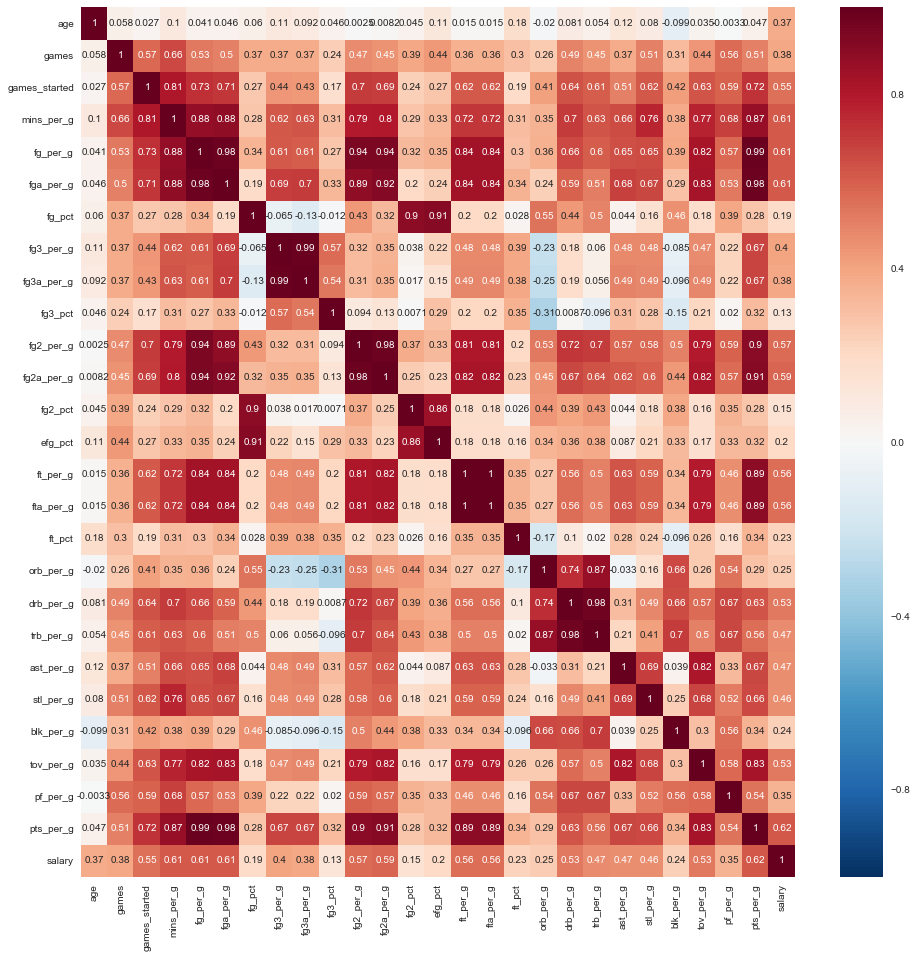

In [13]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)

In [14]:
# Ridge for all data
from sklearn import linear_model
from sklearn.linear_model import Ridge
import numpy as np
#assigning columns to X and Y variables
y = df['salary'] 
X = df.drop(['salary'], axis =1)
reg = linear_model.Ridge (alpha = .1)
reg.fit (X,y) 
reg_y = reg.predict(X)
Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
print reg.coef_

print reg.intercept_ 
print "mean square error: ", mean_squared_error(y, reg_y)
print "variance or r-squared: ", explained_variance_score(y, reg_y)

[  442453.57773375    21319.39061245    32075.34666275   -13971.9418545
  7354206.20919582  6779565.08080541  2240477.83135919  5685347.73364309
 -8771136.41319807 -4673803.94461488 -5962785.74662696 -4872568.67622859
  2831257.13808128 -3059720.7785583   1455728.03089805  1455728.03089797
 -1359050.04402948 -7239233.46814987 -5453116.18649828  6719730.85216535
   358204.9901188   -328114.07264273   137058.95244054  -816215.72603331
  -994390.95505184 -2197451.84808625]
-10216530.362
mean square error:  1.71426839631e+13
variance or r-squared:  0.587851393834


In [15]:
# Lasso For all data
from sklearn import linear_model
from sklearn.linear_model import Lasso
y = df['salary'] 
X = df.drop(['salary'], axis =1)
reg = linear_model.Lasso(alpha = 0.1)        #higher alpha (penality parameter), fewer predictors
reg.fit(X, y)
reg_y = reg.predict(X)
print 'Coefficients: ', reg.coef_
print "y-intercept ", reg.intercept_
print "mean square error: ", mean_squared_error(y, reg_y)
print "variance or r-squared: ", explained_variance_score(y, reg_y)

Coefficients:  [  4.43755098e+05   2.24844746e+04   3.18951065e+04   2.00394729e+03
   2.47695427e+06   5.54502234e+05   8.49670953e+06   5.78299361e+06
  -2.82051896e+06  -4.17282712e+06  -4.81870956e+06   1.28097803e+06
   4.28590190e+06  -1.10620937e+07   1.00972610e+06   1.27641911e-07
  -1.28150411e+06  -3.90221732e+06  -2.11932883e+06   3.38851523e+06
   3.65870602e+05  -3.59183711e+05  -4.26626163e+03  -7.77923953e+05
  -1.15518394e+06  -3.17889971e+05]
y-intercept  -9785763.93312
mean square error:  1.73893218812e+13
variance or r-squared:  0.581921664604


/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [16]:
# The rank of features
y = df['salary'] 
X = df.drop(['salary'], axis =1)
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'fg3a_per_g'), (1, 'fga_per_g'), (2, 'fg2a_per_g'), (3, 'orb_per_g'), (4, 'trb_per_g'), (5, 'drb_per_g'), (6, 'fg2_per_g'), (7, 'fg_per_g'), (8, 'fg3_pct'), (9, 'efg_pct'), (10, 'fg_pct'), (11, 'fg2_pct'), (12, 'fg3_per_g'), (13, 'fta_per_g'), (14, 'pts_per_g'), (15, 'ft_per_g'), (16, 'ft_pct'), (17, 'pf_per_g'), (18, 'tov_per_g'), (19, 'ast_per_g'), (20, 'age'), (21, 'blk_per_g'), (22, 'stl_per_g'), (23, 'games_started'), (24, 'games'), (25, 'mins_per_g')]


In [17]:
x = df[['fg3a_per_g','fg2a_per_g','trb_per_g', 'ast_per_g','ft_per_g','age','games']]
Y = df['salary'] 
model1 = lm.LinearRegression()
model1.fit(x, Y)   
model1_y = model1.predict(x)
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in x.columns ]
zip(xcolumns, coef)
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

mean square error:  1.95912570599e+13
variance or r-squared:  0.528982199774
Coefficients:  [ 480967.77544099  452688.48951739  533417.26857765  268069.95298421
  559049.64987587  485252.49473052   12567.73927572]
y-intercept  -13642969.5923


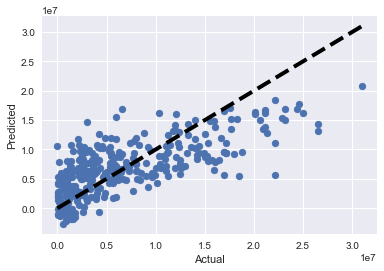

In [16]:
#visualize actural vs. predictive using scatter plot
plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [17]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in x.columns ]
zip(xcolumns, coef)

[('fg3a_per_g', '480967.775'),
 ('fg2a_per_g', '452688.490'),
 ('trb_per_g', '533417.269'),
 ('ast_per_g', '268069.953'),
 ('ft_per_g', '559049.650'),
 ('age', '485252.495'),
 ('games', '12567.739')]

In [18]:
runs_reg_model1 = sm.ols("salary~fg3a_per_g+fg2_per_g+trb_per_g+ast_per_g+ft_per_g+age+games",df)
runs_reg = runs_reg_model1.fit()
print runs_reg.summary()

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     51.74
Date:                Thu, 30 Nov 2017   Prob (F-statistic):           1.46e-49
Time:                        21:53:12   Log-Likelihood:                -5688.1
No. Observations:                 340   AIC:                         1.139e+04
Df Residuals:                     332   BIC:                         1.142e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.336e+07   1.58e+06     -8.441      0.0

In [19]:
# Lasso
from sklearn import linear_model
from sklearn.linear_model import Lasso
x = df[['fg3a_per_g','fg2a_per_g','trb_per_g', 'ast_per_g','ft_per_g','age','games']]
Y = df['salary'] 
reg = linear_model.Lasso(alpha = 0.1)        #higher alpha (penality parameter), fewer predictors
reg.fit(x, Y)
reg_y = reg.predict(x)
print 'Coefficients: ', reg.coef_
print "y-intercept ", reg.intercept_
print "mean square error: ", mean_squared_error(Y, reg_y)
print "variance or r-squared: ", explained_variance_score(Y, reg_y)

Coefficients:  [ 480967.76813196  452688.5115897   533417.30113261  268070.03224558
  559049.48923473  485252.48689346   12567.73771917]
y-intercept  -13642969.4261
mean square error:  1.95912570599e+13
variance or r-squared:  0.528982199774


In [20]:
#selec only 2 X variables
y = df['salary'] 
X = df.drop(['salary'], axis =1)
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print "mean square error: ", mean_squared_error(y, model2_y)
print "variance or r-squared: ", explained_variance_score(y, model2_y)

mean square error:  2.56755584819e+13
variance or r-squared:  0.382701934912


# Classification

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
df1 = df
# print out the mean salary
df1['salary'].mean()

6590092.488235294

In [23]:
conditions = [(df1['salary'] >= 4000000) & (df1['salary'] <= 8070175),
              (df1['salary'] > 8070175),
              (df1['salary'] < 4000000)]
choices = ['1', '2', '0']
df1['Salary_Labels'] = np.select(conditions, choices)
df1.head()
# Salary is between (4000000,8070175) is medium salary
#salary is more than 8070175 is high salary
#salary is less than 4000000 is low salary

,age,games,games_started,mins_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,...,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,salary,Salary_Labels
0,23,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,...,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,5994764,1
1,23,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,...,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,3140517,0
2,31,61,45,25.9,3.0,6.9,0.440,1.0,2.5,0.411,...,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,12500000,2
3,28,39,15,15.0,2.3,4.6,0.500,0.0,0.1,0.000,...,3.4,4.5,0.3,0.5,0.6,0.8,2.0,5.3,4638203,1
4,28,62,0,8.6,0.7,1.4,0.523,0.0,0.0,0.000,...,1.7,2.5,0.4,0.4,0.4,0.3,1.4,1.7,7643979,1


In [24]:
# count the number of palayes on each salary status
count = df1.groupby('Salary_Labels').count()
count

,age,games,games_started,mins_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,...,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,salary
Salary_Labels,,,,,,,,,,,,,,,,,,,,,
0,167,167,167,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,167
1,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
2,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103


In [25]:
X = df1[['fg3a_per_g','fg2a_per_g','trb_per_g', 'ast_per_g','ft_per_g','age','games']]
y = df1['Salary_Labels']

In [26]:
# evaluate the model by splitting into train (70%) and test sets (30%)
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# name your model as "dt"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.334, random_state= 2)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [27]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(226, 7) (226,)
(114, 7) (114,)


In [28]:
import numpy as np
from sklearn.metrics import roc_auc_score

print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"



0.587719298246
--------------------------------------------------------
[[42  9 10]
 [ 9  2  9]
 [ 5  5 23]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.75      0.69      0.72        61
          1       0.12      0.10      0.11        20
          2       0.55      0.70      0.61        33

avg / total       0.58      0.59      0.58       114

--------------------------------------------------------


In [29]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))

0.587719298246
[[42  9 10]
 [ 9  2  9]
 [ 5  5 23]]


In [30]:
# Cross validation for Decision Tree
scores = cross_val_score(dt, X, y, scoring='accuracy', cv=5)
print scores
print scores.mean()

[ 0.60869565  0.62318841  0.57352941  0.55223881  0.59701493]
0.590933440216


In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

0.99705882352941178

In [32]:
print metrics.accuracy_score(y_test, clf.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, clf.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, clf.predict(X_test))


1.0
--------------------------------------------------------
[[61  0  0]
 [ 0 20  0]
 [ 0  0 33]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        61
          1       1.00      1.00      1.00        20
          2       1.00      1.00      1.00        33

avg / total       1.00      1.00      1.00       114



In [33]:
# another method
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

,feature,importance
0,fg3a_per_g,0.123465
1,fg2a_per_g,0.171195
2,trb_per_g,0.154614
3,ast_per_g,0.091744
4,ft_per_g,0.132473
5,age,0.209898
6,games,0.116612


In [34]:
# Cross validation for Decision Tree
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
print scores
print scores.mean()

[ 0.66666667  0.69565217  0.63235294  0.64179104  0.6119403 ]
0.649680625008


In [35]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))


0.640350877193
--------------------------------------------------------
[[50  0 11]
 [13  1  6]
 [ 8  3 22]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.70      0.82      0.76        61
          1       0.25      0.05      0.08        20
          2       0.56      0.67      0.61        33

avg / total       0.58      0.64      0.60       114



In [37]:
# Cross validation for Decision Tree
scores = cross_val_score(lr, X, y, scoring='accuracy', cv=5)
print scores
print scores.mean()

[ 0.5942029   0.68115942  0.60294118  0.67164179  0.65671642]
0.641332340853


/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


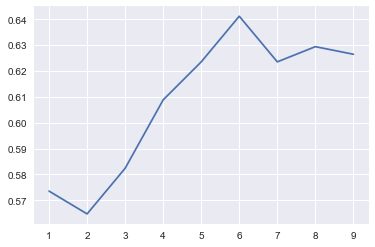

In [38]:
from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()

In [39]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.641176470588
{'n_neighbors': 6}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')


In [40]:
X_new_df = SelectKBest(chi2, k=4).fit_transform(X, y)
print X_new_df

[[  1.4   0.6   0.6  68. ]
 [  8.2   1.1   2.   80. ]
 [  4.4   1.3   1.4  61. ]
 ..., 
 [  1.6   0.2   0.2  19. ]
 [  2.8   0.8   0.7  44. ]
 [  6.2   0.8   0.8  38. ]]


In [41]:
# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X_new_df, y, test_size=0.3, random_state=0)
#model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))


0.529411764706
--------------------------------------------------------
[[32  8 11]
 [ 5  6  8]
 [ 9  7 16]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.70      0.63      0.66        51
          1       0.29      0.32      0.30        19
          2       0.46      0.50      0.48        32

avg / total       0.54      0.53      0.54       102



In [42]:
output_scoring = lr.predict(X)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted high/low salary'])
predicted_y.head()

,Predicted high/low salary
0,0
1,2
2,0
3,0
4,0


In [43]:
probs = lr.predict_proba(X)
probs = pd.DataFrame(probs, columns=['prob of low', 'prob of med', 'pro of high'])
probs.head()

,prob of low,prob of med,pro of high
0,0.618651,0.287923,0.093425
1,0.380223,0.178914,0.440863
2,0.476091,0.330544,0.193365
3,0.574053,0.205471,0.220476
4,0.704862,0.197143,0.097995


In [44]:
high_low_salary = predicted_y.join(probs)
high_low_salary.head()

,Predicted high/low salary,prob of low,prob of med,pro of high
0,0,0.618651,0.287923,0.093425
1,2,0.380223,0.178914,0.440863
2,0,0.476091,0.330544,0.193365
3,0,0.574053,0.205471,0.220476
4,0,0.704862,0.197143,0.097995
